In [1]:
import numpy as np
import pandas as pd 
import openpyxl
import matplotlib.pyplot as plt 
import seaborn as sns

### Shopping Company's Internal Data

In [2]:
# order report
order_report_df = pd.read_excel('https://github.com/sohelshekhatik1998/cointab/blob/main/Company%20X%20-%20Order%20Report.xlsx?raw=true')
order_report_df.head()

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [3]:
order_report_df.ExternOrderNo.value_counts()

2001809820    14
2001827036     8
2001812854     8
2001821185     8
2001817093     8
              ..
2001814580     1
2001820690     1
2001806686     1
2001806823     1
2001807012     1
Name: ExternOrderNo, Length: 124, dtype: int64

In [4]:
order_report_df.groupby('ExternOrderNo')['Order Qty'].sum()

ExternOrderNo
2001806210     2.0
2001806226     2.0
2001806229     3.0
2001806232     8.0
2001806233     2.0
              ... 
2001821995     2.0
2001822466    10.0
2001823564     6.0
2001825261    13.0
2001827036     9.0
Name: Order Qty, Length: 124, dtype: float64

In [5]:
# sku master with gross weight of each product

# - If the total weight is 400 gram then weight slab should be 0.5
# - If the total weight is 950 gram then weight slab should be 1
# - If the total weight is 1 KG then weight slab should be 1
# - If the total weight is 2.2 KG then weight slab should be 2.5 

sku_master_df = pd.read_excel('https://github.com/sohelshekhatik1998/cointab/blob/main/Company%20X%20-%20SKU%20Master.xlsx?raw=true')
sku_master_df.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [6]:
sku_master_df.describe()

,Weight (g)
count,66.000000
mean,219.742424
std,146.855482
min,10.000000
25%,116.250000
50%,165.000000
75%,290.000000
max,600.000000


In [7]:
# warehouse pin code to all India pin code mapping

pin_code_zone_df = pd.read_excel('https://github.com/sohelshekhatik1998/cointab/blob/main/Company%20X%20-%20Pincode%20Zones.xlsx?raw=true')
pin_code_zone_df.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [8]:
pin_code_zone_df.shape

(124, 3)

In [9]:
pin_code_zone_df['Warehouse Pincode'].value_counts()

121003    124
Name: Warehouse Pincode, dtype: int64

In [10]:
pin_code_zone_df['Customer Pincode'].value_counts()

302017    5
313001    4
302002    2
302031    2
248001    2
         ..
723146    1
140604    1
831006    1
562110    1
313301    1
Name: Customer Pincode, Length: 108, dtype: int64

In [11]:
pin_code_zone_df.Zone.value_counts()

b    79
d    38
e     7
Name: Zone, dtype: int64

### Courier Company's Internal Data

In [12]:
cc_invoice_df = pd.read_excel('https://github.com/sohelshekhatik1998/cointab/blob/main/Courier%20Company%20-%20Invoice.xlsx?raw=true')
cc_invoice_df.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [13]:
order_id_zone = cc_invoice_df[['Order ID', 'Zone', 'Type of Shipment']]
order_id_zone.columns = ['ExternOrderNo', 'Zone', 'Type of Shipment']
order_id_zone.head()

,ExternOrderNo,Zone,Type of Shipment
0,2001806232,d,Forward charges
1,2001806273,d,Forward charges
2,2001806408,d,Forward charges
3,2001806458,b,Forward charges
4,2001807012,d,Forward charges


In [14]:
cc_invoice_df.Zone.value_counts()

d    98
b    24
e     2
Name: Zone, dtype: int64

In [15]:
cc_invoice_df['Type of Shipment'].value_counts()

Forward charges            109
Forward and RTO charges     15
Name: Type of Shipment, dtype: int64

In [16]:
cc_invoice_df.groupby(['Zone', 'Type of Shipment'])['Zone'].count()

Zone  Type of Shipment       
b     Forward and RTO charges     2
      Forward charges            22
d     Forward and RTO charges    11
      Forward charges            87
e     Forward and RTO charges     2
Name: Zone, dtype: int64

In [17]:
cc_invoice_df['Order ID'].value_counts()

2001806232    1
2001821284    1
2001806768    1
2001806304    1
2001827036    1
             ..
2001806233    1
2001806229    1
2001806226    1
2001806210    1
2001811305    1
Name: Order ID, Length: 124, dtype: int64

In [18]:
# description of charged

cc_invoice_df['Charged Weight'].describe()

count    124.000000
mean       0.956048
std        0.662815
min        0.150000
25%        0.667500
50%        0.725000
75%        1.100000
max        4.130000
Name: Charged Weight, dtype: float64

In [19]:
# courier charges

cc_charges_df = pd.read_excel('https://github.com/sohelshekhatik1998/cointab/blob/main/Courier%20Company%20-%20Rates.xlsx?raw=true')
cc_charges_df.head()

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [20]:
cc_charges_df_t = cc_charges_df.transpose().reset_index()
cc_charges_df_t.columns = ['bill_type', 'charges']
cc_charges_df_t.head()

,bill_type,charges
0,fwd_a_fixed,29.5
1,fwd_a_additional,23.6
2,fwd_b_fixed,33.0
3,fwd_b_additional,28.3
4,fwd_c_fixed,40.1


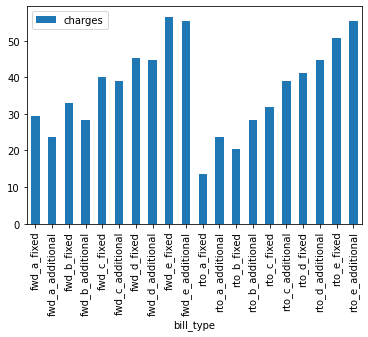

In [21]:
cc_charges_df_t.plot.bar(x='bill_type', y='charges')


**The charges are dependent upon two factors**:

- Weight of the product

-  Distance between the warehouse (pickup location) and customer’s delivery address
(destination location)

In [22]:
shopping_df = pd.merge(pd.merge(order_report_df, sku_master_df, how='inner', on='SKU'), order_id_zone, how='inner', on='ExternOrderNo')
shopping_df.head(15)

,ExternOrderNo,SKU,Order Qty,Weight (g),Zone,Type of Shipment
0,2001827036,8904223818706,1.0,127,b,Forward charges
1,2001827036,8904223819093,1.0,150,b,Forward charges
2,2001827036,8904223819109,1.0,100,b,Forward charges
3,2001827036,8904223818430,1.0,165,b,Forward charges
4,2001827036,8904223819277,1.0,350,b,Forward charges
5,2001827036,GIFTBOX202002,1.0,500,b,Forward charges
6,2001827036,GIFTBOX202002,1.0,500,b,Forward charges
7,2001827036,8904223818638,2.0,137,b,Forward charges
8,2001827036,SACHETS001,1.0,10,b,Forward charges
9,2001821995,8904223818706,1.0,127,d,Forward charges


In [23]:
shopping_df['Type of Shipment'].value_counts()

Forward charges            351
Forward and RTO charges     50
Name: Type of Shipment, dtype: int64

In [24]:
shopping_df['Weight (g)'].describe()

count    401.000000
mean     181.566085
std       92.583321
min       10.000000
25%      121.000000
50%      133.000000
75%      240.000000
max      600.000000
Name: Weight (g), dtype: float64

In [25]:
400/1000

0.4

In [26]:
def apply_weight_slab(row):
    """function to apply weight slab"""
    
    if row/1000 <= 0.5:
        return 0.5
    elif row/1000 <= 1.0:
        return 1
    elif row/1000 <= 1.5:
        return 1.5
    elif row/1000 <= 2:
        return 2
    elif row/1000 <= 2.5:
        return 2.5
    elif row/1000 <= 3:
        return 3
    elif row/1000 <= 3.5:
        return 3.5
    elif row/1000 <= 4:
        return 4
    elif row/1000 <= 4.5:
        return 4.5
    elif row/1000 <= 5:
        return 5
    


shopping_df['weighing slab'] = shopping_df['Weight (g)'].apply(apply_weight_slab)

shopping_df.head(15)

,ExternOrderNo,SKU,Order Qty,Weight (g),Zone,Type of Shipment,weighing slab
0,2001827036,8904223818706,1.0,127,b,Forward charges,0.5
1,2001827036,8904223819093,1.0,150,b,Forward charges,0.5
2,2001827036,8904223819109,1.0,100,b,Forward charges,0.5
3,2001827036,8904223818430,1.0,165,b,Forward charges,0.5
4,2001827036,8904223819277,1.0,350,b,Forward charges,0.5
5,2001827036,GIFTBOX202002,1.0,500,b,Forward charges,0.5
6,2001827036,GIFTBOX202002,1.0,500,b,Forward charges,0.5
7,2001827036,8904223818638,2.0,137,b,Forward charges,0.5
8,2001827036,SACHETS001,1.0,10,b,Forward charges,0.5
9,2001821995,8904223818706,1.0,127,d,Forward charges,0.5


In [27]:
shopping_df['weighing slab'].value_counts()

0.5    396
1.0      5
Name: weighing slab, dtype: int64

In [28]:
shopping_df['weighing slab per order'] = shopping_df['Order Qty'] * shopping_df['weighing slab']
shopping_df.head(15)

,ExternOrderNo,SKU,Order Qty,Weight (g),Zone,Type of Shipment,weighing slab,weighing slab per order
0,2001827036,8904223818706,1.0,127,b,Forward charges,0.5,0.5
1,2001827036,8904223819093,1.0,150,b,Forward charges,0.5,0.5
2,2001827036,8904223819109,1.0,100,b,Forward charges,0.5,0.5
3,2001827036,8904223818430,1.0,165,b,Forward charges,0.5,0.5
4,2001827036,8904223819277,1.0,350,b,Forward charges,0.5,0.5
5,2001827036,GIFTBOX202002,1.0,500,b,Forward charges,0.5,0.5
6,2001827036,GIFTBOX202002,1.0,500,b,Forward charges,0.5,0.5
7,2001827036,8904223818638,2.0,137,b,Forward charges,0.5,1.0
8,2001827036,SACHETS001,1.0,10,b,Forward charges,0.5,0.5
9,2001821995,8904223818706,1.0,127,d,Forward charges,0.5,0.5


In [29]:
shopping_df['weighing slab per order'].value_counts()

0.5    331
1.0     51
2.0     12
4.0      3
3.0      3
1.5      1
Name: weighing slab per order, dtype: int64

In [30]:
cc_charges_df.columns

Index(['fwd_a_fixed', 'fwd_a_additional', 'fwd_b_fixed', 'fwd_b_additional',
       'fwd_c_fixed', 'fwd_c_additional', 'fwd_d_fixed', 'fwd_d_additional',
       'fwd_e_fixed', 'fwd_e_additional', 'rto_a_fixed', 'rto_a_additional',
       'rto_b_fixed', 'rto_b_additional', 'rto_c_fixed', 'rto_c_additional',
       'rto_d_fixed', 'rto_d_additional', 'rto_e_fixed', 'rto_e_additional'],
      dtype='object')

In [31]:
cc_charges_df

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [32]:
cc_charges_df['fwd_a_fixed'][0]

29.5

In [33]:
(cc_charges_df['rto_a_additional'][0] * 1.5) + (cc_charges_df['rto_a_fixed'][0] * 1.5)

55.800000000000004

In [34]:
(cc_charges_df['rto_a_fixed'][0] + cc_charges_df['rto_a_additional'][0]) * 1.5

55.800000000000004

In [35]:
shopping_df.columns

Index(['ExternOrderNo', 'SKU', 'Order Qty', 'Weight (g)', 'Zone',
       'Type of Shipment', 'weighing slab', 'weighing slab per order'],
      dtype='object')

In [36]:
def calculate_charges(row):
    """Calculate cost"""
    
    if (row['Zone'] == 'a') and (row['Type of Shipment'] == 'Forward charges'):
        fwd_fixed_charge = cc_charges_df['fwd_a_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_a_additional'][0]

        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * fwd_fixed_charge
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges * additional_weight)
            return additional_cost + fixed_cost
        return fixed_cost
    elif (row['Zone'] == 'a') and (row['Type of Shipment'] =='Forward and RTO charges'):
        fwd_fixed_charge = cc_charges_df['fwd_a_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_a_additional'][0]
        rto_fixed_charge = cc_charges_df['rto_a_fixed'][0]
        rto_additional_charges = cc_charges_df['rto_a_additional'][0]
        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * (fwd_fixed_charge + rto_fixed_charge)
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges + rto_additional_charges) * additional_weight
            return additional_cost + fixed_cost
        return fixed_cost
    
    elif (row['Zone'] == 'b') and (row['Type of Shipment'] == 'Forward charges'):
        fwd_fixed_charge = cc_charges_df['fwd_b_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_b_additional'][0]
        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * fwd_fixed_charge
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges * additional_weight)
            return additional_cost + fixed_cost
        return fixed_cost
    elif (row['Zone'] == 'b') and (row['Type of Shipment'] =='Forward and RTO charges'):
        fwd_fixed_charge = cc_charges_df['fwd_b_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_b_additional'][0]
        rto_fixed_charge = cc_charges_df['rto_b_fixed'][0]
        rto_additional_charges = cc_charges_df['rto_b_additional'][0]
        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * (fwd_fixed_charge + rto_fixed_charge)
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges + rto_additional_charges) * additional_weight
            return additional_cost + fixed_cost
        return fixed_cost
    
    elif (row['Zone'] == 'c') and (row['Type of Shipment'] == 'Forward charges'):
        fwd_fixed_charge = cc_charges_df['fwd_c_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_c_additional'][0]
        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * fwd_fixed_charge
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges * additional_weight)
            return additional_cost + fixed_cost
        return fixed_cost
    elif (row['Zone'] == 'c') and (row['Type of Shipment'] =='Forward and RTO charges'):
        fwd_fixed_charge = cc_charges_df['fwd_c_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_c_additional'][0]
        rto_fixed_charge = cc_charges_df['rto_c_fixed'][0]
        rto_additional_charges = cc_charges_df['rto_c_additional'][0]
        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * (fwd_fixed_charge + rto_fixed_charge)
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges + rto_additional_charges) * additional_weight
            return additional_cost + fixed_cost
        return fixed_cost
    
    elif (row['Zone'] == 'd') and (row['Type of Shipment'] == 'Forward charges'):
        fwd_fixed_charge = cc_charges_df['fwd_d_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_d_additional'][0]

        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * fwd_fixed_charge
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges * additional_weight)
            return additional_cost + fixed_cost
        return fixed_cost
    elif (row['Zone'] == 'd') and (row['Type of Shipment'] =='Forward and RTO charges'):
        fwd_fixed_charge = cc_charges_df['fwd_d_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_d_additional'][0]
        rto_fixed_charge = cc_charges_df['rto_d_fixed'][0]
        rto_additional_charges = cc_charges_df['rto_d_additional'][0]
        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * (fwd_fixed_charge + rto_fixed_charge)
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges + rto_additional_charges) * additional_weight
            return additional_cost + fixed_cost
        return fixed_cost

    elif (row['Zone'] == 'e') and (row['Type of Shipment'] == 'Forward charges'):
        fwd_fixed_charge = cc_charges_df['fwd_e_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_e_additional'][0]
        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * fwd_fixed_charge
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges * additional_weight)
            return additional_cost + fixed_cost
        return fixed_cost
    elif (row['Zone'] == 'c') and (row['Type of Shipment'] =='Forward and RTO charges'):
        fwd_fixed_charge = cc_charges_df['fwd_e_fixed'][0]
        fwd_additional_charges = cc_charges_df['fwd_e_additional'][0]
        rto_fixed_charge = cc_charges_df['rto_e_fixed'][0]
        rto_additional_charges = cc_charges_df['rto_e_additional'][0]
        weight = row['weighing slab per order']
        additional_weight = weight - 0.5
        fixed_cost = 0.5 * (fwd_fixed_charge + rto_fixed_charge)
        if additional_weight > 0:
            additional_cost = (fwd_additional_charges + rto_additional_charges) * additional_weight
            return additional_cost + fixed_cost
        return fixed_cost
    

In [37]:
shopping_df['charge'] = shopping_df.apply(lambda row: calculate_charges(row), axis=1)
shopping_df.head(15)

,ExternOrderNo,SKU,Order Qty,Weight (g),Zone,Type of Shipment,weighing slab,weighing slab per order,charge
0,2001827036,8904223818706,1.0,127,b,Forward charges,0.5,0.5,16.50
1,2001827036,8904223819093,1.0,150,b,Forward charges,0.5,0.5,16.50
2,2001827036,8904223819109,1.0,100,b,Forward charges,0.5,0.5,16.50
3,2001827036,8904223818430,1.0,165,b,Forward charges,0.5,0.5,16.50
4,2001827036,8904223819277,1.0,350,b,Forward charges,0.5,0.5,16.50
5,2001827036,GIFTBOX202002,1.0,500,b,Forward charges,0.5,0.5,16.50
6,2001827036,GIFTBOX202002,1.0,500,b,Forward charges,0.5,0.5,16.50
7,2001827036,8904223818638,2.0,137,b,Forward charges,0.5,1.0,30.65
8,2001827036,SACHETS001,1.0,10,b,Forward charges,0.5,0.5,16.50
9,2001821995,8904223818706,1.0,127,d,Forward charges,0.5,0.5,22.70


In [38]:
shopping_df.charge.describe()

count    396.000000
mean      31.225126
std       25.676012
min       16.500000
25%       22.700000
50%       22.700000
75%       22.700000
max      179.500000
Name: charge, dtype: float64

In [39]:
cc_invoice_df['Billing Amount (Rs.)'].describe()

count    124.000000
mean     110.066129
std       64.060832
min       33.000000
25%       86.700000
50%       90.200000
75%      135.000000
max      403.800000
Name: Billing Amount (Rs.), dtype: float64

In [40]:
shopping_df.rename(columns = {'ExternOrderNo':'Order ID'}, inplace = True)
cc_invoice_df.head(5)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [41]:
cc_invoice_df['Charged Weight'].describe()

count    124.000000
mean       0.956048
std        0.662815
min        0.150000
25%        0.667500
50%        0.725000
75%        1.100000
max        4.130000
Name: Charged Weight, dtype: float64

In [42]:
shopping_df.head()

,Order ID,SKU,Order Qty,Weight (g),Zone,Type of Shipment,weighing slab,weighing slab per order,charge
0,2001827036,8904223818706,1.0,127,b,Forward charges,0.5,0.5,16.5
1,2001827036,8904223819093,1.0,150,b,Forward charges,0.5,0.5,16.5
2,2001827036,8904223819109,1.0,100,b,Forward charges,0.5,0.5,16.5
3,2001827036,8904223818430,1.0,165,b,Forward charges,0.5,0.5,16.5
4,2001827036,8904223819277,1.0,350,b,Forward charges,0.5,0.5,16.5


In [43]:
shopping_df = pd.merge(shopping_df, cc_invoice_df[['Order ID', 'AWB Code', 'Charged Weight', 'Billing Amount (Rs.)']], how='inner', on='Order ID')
shopping_df['Weight (g)'] = round(shopping_df['Weight (g)']/1000,1)
shopping_df.rename(columns={'Weight (g)': 'Total weight as per X (KG)'}, inplace=True)
shopping_df['Weight slab charged by Courier Company (KG)'] = shopping_df['Charged Weight'].apply(apply_weight_slab)
shopping_df['Delivery Zone as per X'] = shopping_df['Zone'].apply(lambda x: x.upper())
shopping_df['Delivery Zone charged by Courier Company'] = shopping_df['Zone'].apply(lambda x: x.upper())
shopping_df.head()

,Order ID,SKU,Order Qty,Total weight as per X (KG),Zone,Type of Shipment,weighing slab,weighing slab per order,charge,AWB Code,Charged Weight,Billing Amount (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company
0,2001827036,8904223818706,1.0,0.1,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B
1,2001827036,8904223819093,1.0,0.2,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B
2,2001827036,8904223819109,1.0,0.1,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B
3,2001827036,8904223818430,1.0,0.2,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B
4,2001827036,8904223819277,1.0,0.4,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B


In [44]:
shopping_df.rename(columns={
    'Weight (g)': 'Total weight as per X (KG)',
    'weighing slab per order':'Weight slab as per X (KG)',
    'Charged Weight': 'Total weight as per Courier Company (KG)',
    'charge': 'Expected Charge as per X (Rs.)',
    'Billing Amount (Rs.)':'Charges Billed by Courier Company (Rs.)'
}, inplace=True)

shopping_df.head()

,Order ID,SKU,Order Qty,Total weight as per X (KG),Zone,Type of Shipment,weighing slab,Weight slab as per X (KG),Expected Charge as per X (Rs.),AWB Code,Total weight as per Courier Company (KG),Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company
0,2001827036,8904223818706,1.0,0.1,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B
1,2001827036,8904223819093,1.0,0.2,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B
2,2001827036,8904223819109,1.0,0.1,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B
3,2001827036,8904223818430,1.0,0.2,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B
4,2001827036,8904223819277,1.0,0.4,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B


In [45]:
shopping_df['Difference Between Expected Charges and Billed Charges (Rs.)'] = shopping_df['Expected Charge as per X (Rs.)'] - shopping_df['Charges Billed by Courier Company (Rs.)']
shopping_df.head()

,Order ID,SKU,Order Qty,Total weight as per X (KG),Zone,Type of Shipment,weighing slab,Weight slab as per X (KG),Expected Charge as per X (Rs.),AWB Code,Total weight as per Courier Company (KG),Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,8904223818706,1.0,0.1,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B,-101.4
1,2001827036,8904223819093,1.0,0.2,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B,-101.4
2,2001827036,8904223819109,1.0,0.1,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B,-101.4
3,2001827036,8904223818430,1.0,0.2,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B,-101.4
4,2001827036,8904223819277,1.0,0.4,b,Forward charges,0.5,0.5,16.5,1091122418320,1.6,117.9,0.5,B,B,-101.4


In [46]:
shopping_df['Difference Between Expected Charges and Billed Charges (Rs.)'].describe()

count    396.000000
mean     -91.419823
std       63.565324
min     -381.100000
25%     -112.300000
50%      -67.500000
75%      -67.500000
max       44.500000
Name: Difference Between Expected Charges and Billed Charges (Rs.), dtype: float64

In [47]:
final_data = shopping_df[[
    'Order ID',
    'AWB Code',
    'Total weight as per X (KG)',
    'Weight slab as per X (KG)',
    'Total weight as per Courier Company (KG)',
    'Weight slab charged by Courier Company (KG)',
    'Delivery Zone as per X',
    'Delivery Zone charged by Courier Company',
    'Expected Charge as per X (Rs.)',
    'Charges Billed by Courier Company (Rs.)',
    'Difference Between Expected Charges and Billed Charges (Rs.)'
]]

final_data.head()

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,1091122418320,0.1,0.5,1.6,0.5,B,B,16.5,117.9,-101.4
1,2001827036,1091122418320,0.2,0.5,1.6,0.5,B,B,16.5,117.9,-101.4
2,2001827036,1091122418320,0.1,0.5,1.6,0.5,B,B,16.5,117.9,-101.4
3,2001827036,1091122418320,0.2,0.5,1.6,0.5,B,B,16.5,117.9,-101.4
4,2001827036,1091122418320,0.4,0.5,1.6,0.5,B,B,16.5,117.9,-101.4


In [48]:
final_data.to_csv('calculation.csv', index=False)

In [49]:
round(final_data[final_data['Difference Between Expected Charges and Billed Charges (Rs.)'] >= 0].sum()['Difference Between Expected Charges and Billed Charges (Rs.)'],2)

84.75

In [50]:
# summary

summary_data = {
    'count': [
        final_data[final_data['Difference Between Expected Charges and Billed Charges (Rs.)'] == 0].count()['Difference Between Expected Charges and Billed Charges (Rs.)'],
        final_data[final_data['Difference Between Expected Charges and Billed Charges (Rs.)'] <= 0].count()['Difference Between Expected Charges and Billed Charges (Rs.)'],
        final_data[final_data['Difference Between Expected Charges and Billed Charges (Rs.)'] >= 0].count()['Difference Between Expected Charges and Billed Charges (Rs.)']
    ],
    'Amount':[
        round(final_data[final_data['Difference Between Expected Charges and Billed Charges (Rs.)'] == 0].sum()['Difference Between Expected Charges and Billed Charges (Rs.)'],2),
        round(final_data[final_data['Difference Between Expected Charges and Billed Charges (Rs.)'] <= 0].sum()['Difference Between Expected Charges and Billed Charges (Rs.)'],2),
        round(final_data[final_data['Difference Between Expected Charges and Billed Charges (Rs.)'] >= 0].sum()['Difference Between Expected Charges and Billed Charges (Rs.)'],2)
    ]
}


summary_df = pd.DataFrame(summary_data, index=['Total Orders - Correctly Charged', 'Total Orders - Over Charged', 'Total Orders - Under Charged'])
summary_df.head()

,count,Amount
Total Orders - Correctly Charged,0,0.00
Total Orders - Over Charged,392,-36287.00
Total Orders - Under Charged,4,84.75


In [51]:
summary_df.to_csv('summary.csv')